In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zeotap/Products.csv
/kaggle/input/zeotap/Customers.csv
/kaggle/input/zeotap/Transactions.csv


In [47]:
customers_df = pd.read_csv("/kaggle/input/zeotap/Customers.csv")
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [48]:
products_df=pd.read_csv("/kaggle/input/zeotap/Products.csv")
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [49]:
transactions_df=pd.read_csv("/kaggle/input/zeotap/Transactions.csv")
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# EDA and Business Insight

In [50]:
#creating a merged dataset first

#changing the dates to date time format first
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

#final df
df=transactions_df.merge(customers_df,on='CustomerID')
df=df.merge(products_df,on='ProductID')

In [51]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [52]:
#missing values check
print(df.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


# 1. Customer Demographics

In [53]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [54]:
region_dist=df['Region'].value_counts(normalize=True) * 100
print(region_dist)

Region
South America    30.4
North America    24.4
Europe           23.4
Asia             21.8
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Customer Distribution by Region')

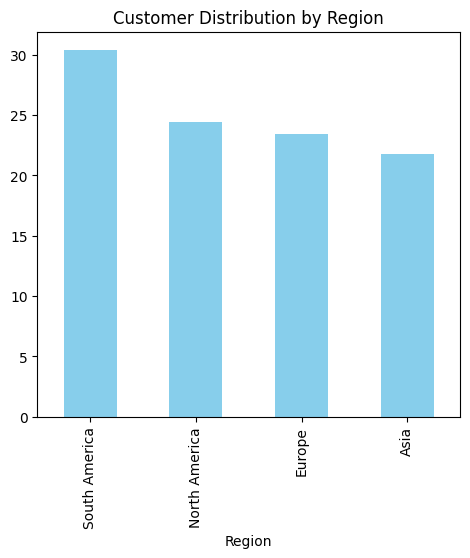

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
region_dist.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')

# 2. New Signups Annually

In [56]:
df['SignupYear'] = df['SignupDate'].dt.year
signup_growth = df['SignupYear'].value_counts().sort_index()
print( signup_growth)

SignupYear
2022    332
2023    281
2024    387
Name: count, dtype: int64


## Visualizing the annual growths

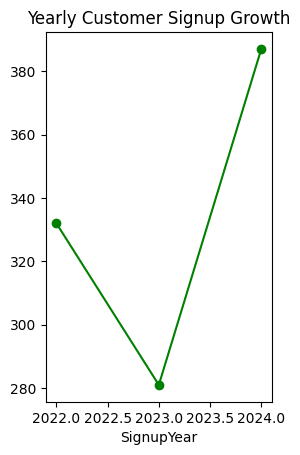

In [57]:

plt.subplot(1, 2, 2)
signup_growth.plot(kind='line', marker='o', color='green')
plt.title('Yearly Customer Signup Growth')
plt.show()

# 3. Transaction Analysis

In [58]:
df['TransactionQuarter'] = df['TransactionDate'].dt.quarter
quarterly_transactions = df['TransactionQuarter'].value_counts().sort_index()
print("Quarterly Transaction Distribution:\n", quarterly_transactions)

Quarterly Transaction Distribution:
 TransactionQuarter
1    264
2    241
3    286
4    209
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


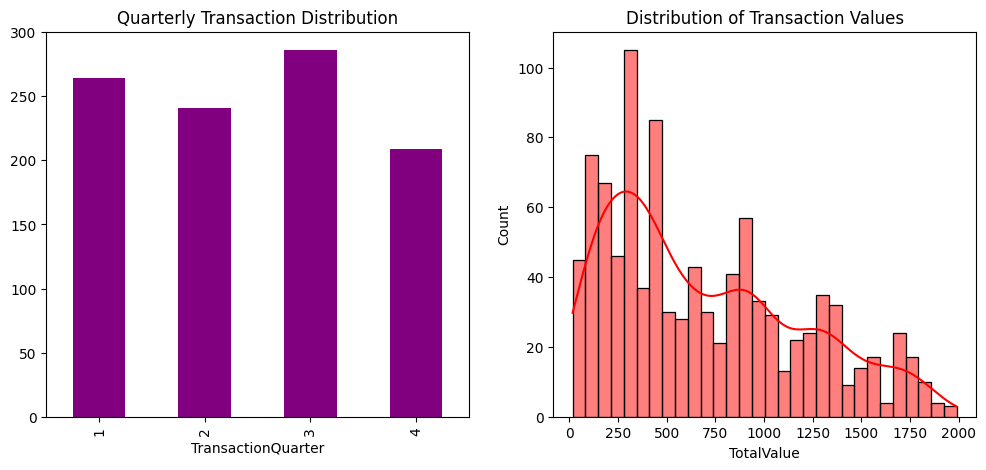

In [59]:
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
quarterly_transactions.plot(kind='bar', color='purple')
plt.title('Quarterly Transaction Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['TotalValue'], bins=30, kde=True, color='red')
plt.title('Distribution of Transaction Values')
plt.show()

# 4. Customer Life Cycle

In [60]:
customer_revenue = df.groupby('CustomerID')['TotalValue'].sum()
customer_region = df[['CustomerID', 'Region']].drop_duplicates()
clv_by_region = customer_region.merge(customer_revenue, on='CustomerID').groupby('Region')['TotalValue'].mean()

In [61]:
print("Average Customer Lifetime Value by Region:\n", clv_by_region)

Average Customer Lifetime Value by Region:
 Region
Asia             3456.249318
Europe           3325.092600
North America    3311.160870
South America    3717.840000
Name: TotalValue, dtype: float64


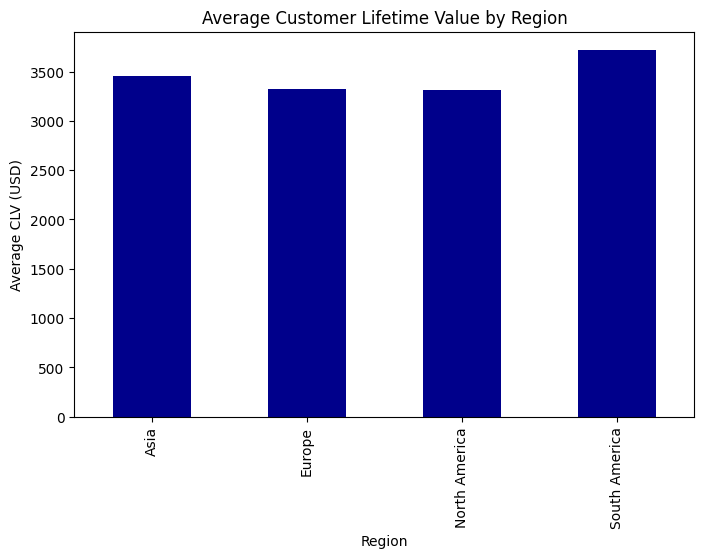

In [62]:
plt.figure(figsize=(8, 5))
clv_by_region.plot(kind='bar', color='darkblue')
plt.title('Average Customer Lifetime Value by Region')
plt.ylabel('Average CLV (USD)')
plt.show()

# 5.Product Popularity

In [63]:
df['TransactionYearMonth'] = df['TransactionDate'].dt.to_period('M')
product_trends = df.groupby(['ProductName', 'TransactionYearMonth'])['Quantity'].sum().unstack().fillna(0)

In [ ]:
top_products = product_trends.sum(axis=1).nlargest(5).index
product_trends.loc[top_products].T.plot(figsize=(10, 6))
plt.title('Sales Trends for Top 5 Products Over Time')
plt.ylabel('Quantity Sold')
plt.xlabel('Year-Month')
plt.show()

# 6.Customer Acquisition Cost

In [65]:
customers_acquired = df.groupby('Region')['CustomerID'].nunique()
marketing_cost_df = pd.DataFrame({'Region': ['Asia', 'Europe', 'North America'], 'MarketingCost': [50000, 70000, 60000]})

cac_by_region = marketing_cost_df.merge(customers_acquired, on='Region')
cac_by_region['CAC'] = cac_by_region['MarketingCost'] / cac_by_region['CustomerID']

<Figure size 800x500 with 0 Axes>

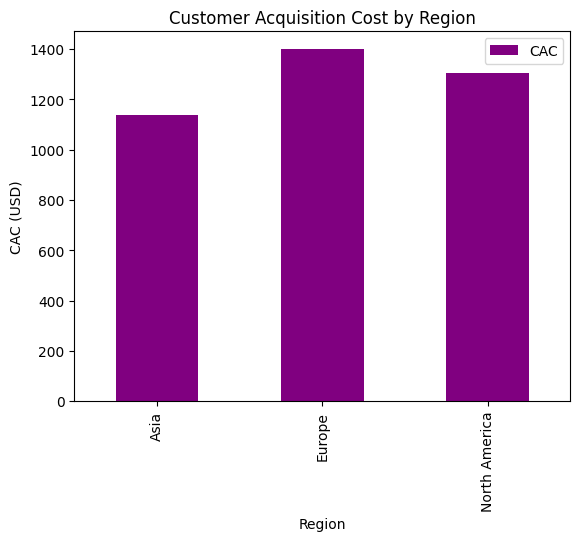

In [66]:
plt.figure(figsize=(8, 5))
cac_by_region.plot(kind='bar', x='Region', y='CAC', color='purple')
plt.title('Customer Acquisition Cost by Region')
plt.ylabel('CAC (USD)')
plt.show()

# Lookalike Model
Using profle of customers and transaction history to recommend similar customers

## Steps:
    1. Feature Engineering
    2. Similarity Calculation
    3. Recommendations and Output

### Feature Engineering

In [22]:
df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [23]:
def customer_profile(df):
    profiles=df[['CustomerID','Region','SignupDate']].drop_duplicates()
    transaction_behavior = df.groupby('CustomerID').agg(
        TotalSpend=('TotalValue', 'sum'),
        AvgTransactionValue=('TotalValue', 'mean'),
        FavoriteCategory=('Category', lambda x: x.mode()[0]),  # Most frequent category
        TotalTransactions=('TransactionID', 'nunique')
    ).reset_index()
    #merge the two
    profiles=profiles.merge(transaction_behavior,on='CustomerID')
    profiles['DaysSinceSignup'] = (pd.Timestamp.now() - profiles['SignupDate']).dt.days
    profiles.drop(columns=['SignupDate'], inplace=True)
    
    return profiles

In [24]:
profile = customer_profile(df)

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(profile[['Region', 'FavoriteCategory']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Region', 'FavoriteCategory']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
numerical_features = profile[['TotalSpend', 'AvgTransactionValue', 'TotalTransactions', 'DaysSinceSignup']]
final_features = pd.concat([numerical_features.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_features)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(scaled_features)

In [29]:
def get_top_lookalikes(customer_id, similarity_matrix, profile, top_n=3):
    customer_index = profile[profile['CustomerID'] == customer_id].index[0]
    similarity_scores = similarity_matrix[customer_index]
    
    # Exclude the customer itself
    similarity_scores[customer_index] = -1  # Set to -1 to exclude
    
    # Get top N similar customers
    top_indices = np.argsort(similarity_scores)[-top_n:][::-1]
    top_customers = profile.iloc[top_indices]['CustomerID'].values
    top_scores = similarity_scores[top_indices]
    
    return list(zip(top_customers, top_scores))

# Generate lookalike recommendations for the first 20 customers


In [30]:
lookalike_map = {}
for customer_id in profile['CustomerID'].iloc[:20]:
    lookalike_map[customer_id] = get_top_lookalikes(customer_id, similarity_matrix, profile)

# Save results to Lookalike.csv
lookalike_df = pd.DataFrame.from_dict(lookalike_map, orient='index')
lookalike_df.to_csv('Lookalike.csv', index_label='CustomerID')

print("Lookalike recommendations saved to Lookalike.csv")

Lookalike recommendations saved to Lookalike.csv


In [31]:
res=pd.read_csv("/kaggle/working/Lookalike.csv")

In [32]:
res.head()

,CustomerID,0,1,2
0,C0199,"('C0197', 0.9631077780655891)","('C0069', 0.9013979547795744)","('C0119', 0.8906038929913725)"
1,C0146,"('C0186', 0.8954493117244725)","('C0115', 0.8300257439019598)","('C0140', 0.7332213653405341)"
2,C0127,"('C0069', 0.9768181492157522)","('C0105', 0.8813704105508106)","('C0119', 0.8661219048058098)"
3,C0087,"('C0126', 0.9015236235875217)","('C0187', 0.8802503265995125)","('C0155', 0.8669053955344979)"
4,C0070,"('C0135', 0.9858429906097947)","('C0073', 0.9341607714753187)","('C0074', 0.9285690488567261)"


# Customer Segmentation and Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

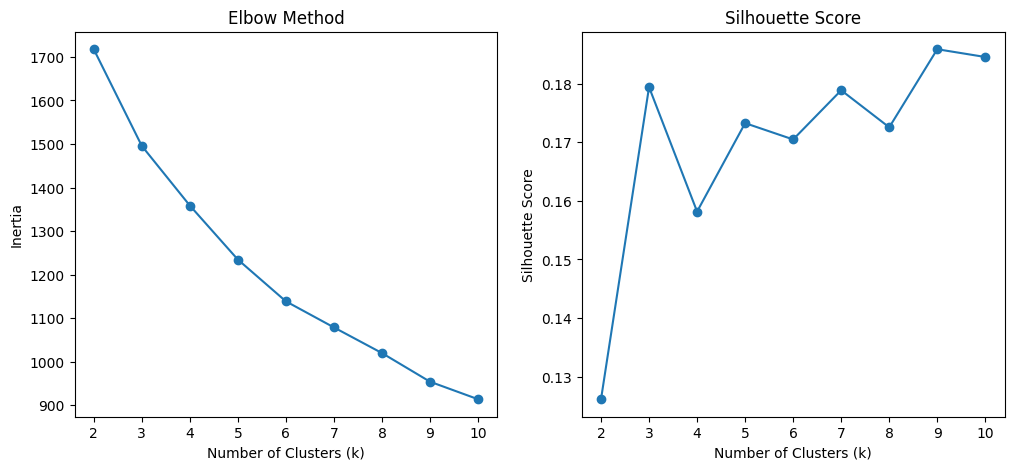

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [34]:
optimal_k = 9
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

In [36]:
profile['Cluster'] = kmeans.labels_

In [37]:
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")


Davies-Bouldin Index: 1.54


In [38]:
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.19


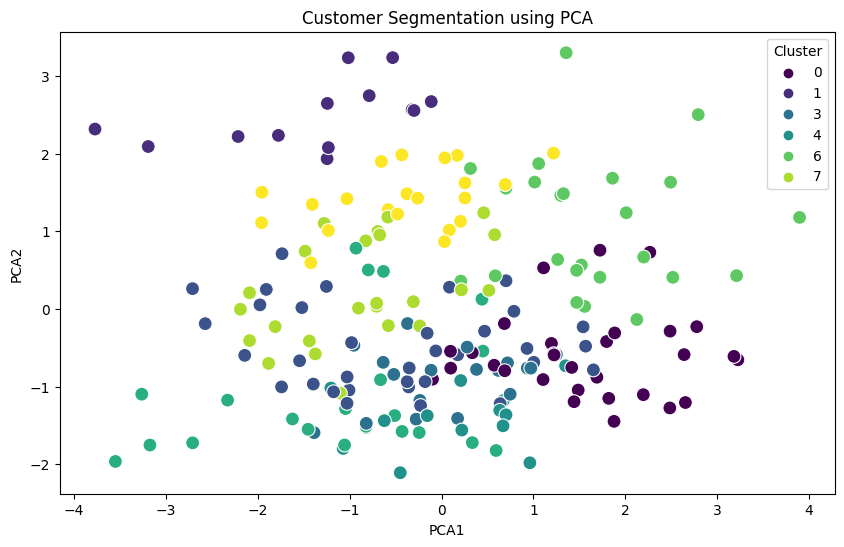

In [40]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
profile['PCA1'] = pca_features[:, 0]
profile['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=profile, palette='viridis', s=100)
plt.title('Customer Segmentation using PCA')
plt.show()

In [41]:
cluster_summary = profile.groupby('Cluster').agg(
    TotalCustomers=('CustomerID', 'nunique'),
    AvgTotalSpend=('TotalSpend', 'mean'),
    AvgTransactions=('TotalTransactions', 'mean'),
    MostCommonRegion=('Region', lambda x: x.mode()[0]),
    MostCommonCategory=('FavoriteCategory', lambda x: x.mode()[0])
).reset_index()

print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
    Cluster  TotalCustomers  AvgTotalSpend  AvgTransactions MostCommonRegion  \
0        0              30    5039.059333         6.300000    South America   
1        1              13    2405.015385         4.384615    North America   
2        2              34    3066.363529         4.500000           Europe   
3        3              18    2592.567778         3.944444    South America   
4        4              13    3898.820000         5.000000           Europe   
5        5              22    2152.937273         3.454545    South America   
6        6              24    5870.216667         8.541667             Asia   
7        7              24    2334.532083         3.708333             Asia   
8        8              21    2936.797619         4.523810    North America   

  MostCommonCategory  
0              Books  
1           Clothing  
2              Books  
3        Electronics  
4         Home Decor  
5         Home Decor  
6              Books  
7      